# Image Pre Processing

## 1. Importing The ImageDataGenerator Library

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 2. Image Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)



## 3. Apply ImageDataGenerator Functionality To Trainset And Testset

In [3]:
training_set = train_datagen.flow_from_directory('C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\level\\training',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\level\\validation',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


# Model Building
## 1.Importing The Model Building Libraries

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
IMAGE_SIZE = [224, 224]

train_path = 'C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\level\\training'
valid_path = 'C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\level\\validation'



## 2. Loading The Model

In [6]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

## 3. Adding Flatten Layer

In [7]:
for layer in vgg16.layers:
    layer.trainable = False

In [8]:
folders = glob('C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\level\\training\\*')

In [9]:
folders

['C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\level\\training\\01-minor',
 'C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\level\\training\\02-moderate',
 'C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\level\\training\\03-severe']

In [10]:
x = Flatten()(vgg16.output)

In [11]:
len(folders)

3

## 4. Adding Output Layer


In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

## 5. Creating A Model Object


In [13]:
model = Model(inputs=vgg16.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## 6. Compiling The Model

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## 7. Training The Model


In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)



C:\Users\DELL\AppData\Local\Temp\ipykernel_13164\1584804037.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/25
98/98 [==============================] - 631s 6s/step - loss: 1.2529 - accuracy: 0.5546 - val_loss: 1.3873 - val_accuracy: 0.5965
Epoch 2/25
98/98 [==============================] - 626s 6s/step - loss: 0.8113 - accuracy: 0.6946 - val_loss: 1.2163 - val_accuracy: 0.5614
Epoch 3/25
98/98 [==============================] - 628s 6s/step - loss: 0.5283 - accuracy: 0.7916 - val_loss: 1.2643 - val_accuracy: 0.5673
Epoch 4/25
98/98 [==============================] - 700s 7s/step - loss: 0.4912 - accuracy: 0.8151 - val_loss: 1.1660 - val_accuracy: 0.5673
Epoch 5/25
98/98 [==============================] - 596s 6s/step - loss: 0.2962 - accuracy: 0.8774 - val_loss: 1.0179 - val_accuracy: 0.6374
Epoch 6/25
98/98 [==============================] - 599s 6s/step - loss: 0.2215 - accuracy: 0.9183 - val_loss: 1.4558 - val_accuracy: 0.5731
Epoch 7/25
98/98 [==============================] - 609s 6s/step - loss: 0.2400 - accuracy: 0.9091 - val_loss: 1.1669 - val_accuracy: 0.6257
Epoch 8/25
98

## 8. Saving The Model

In [30]:
from tensorflow.keras.models import load_model

model.save('C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\level.h5')

## 9. Testing The Model

In [31]:
from tensorflow.keras.models import load_model
import cv2
from skimage.transform import resize

In [32]:
model = load_model('C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\level.h5')

In [33]:
def detect(frame):
  img = cv2.resize(frame,(224,224))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

  if(np.max(img)>1):
    img = img/255.0
  img = np.array([img])
  prediction = model.predict(img)
  label = ["minor","moderate","severe"]
  preds = label[np.argmax(prediction)]
  return preds

In [34]:
import numpy as np

In [35]:
from PIL import Image

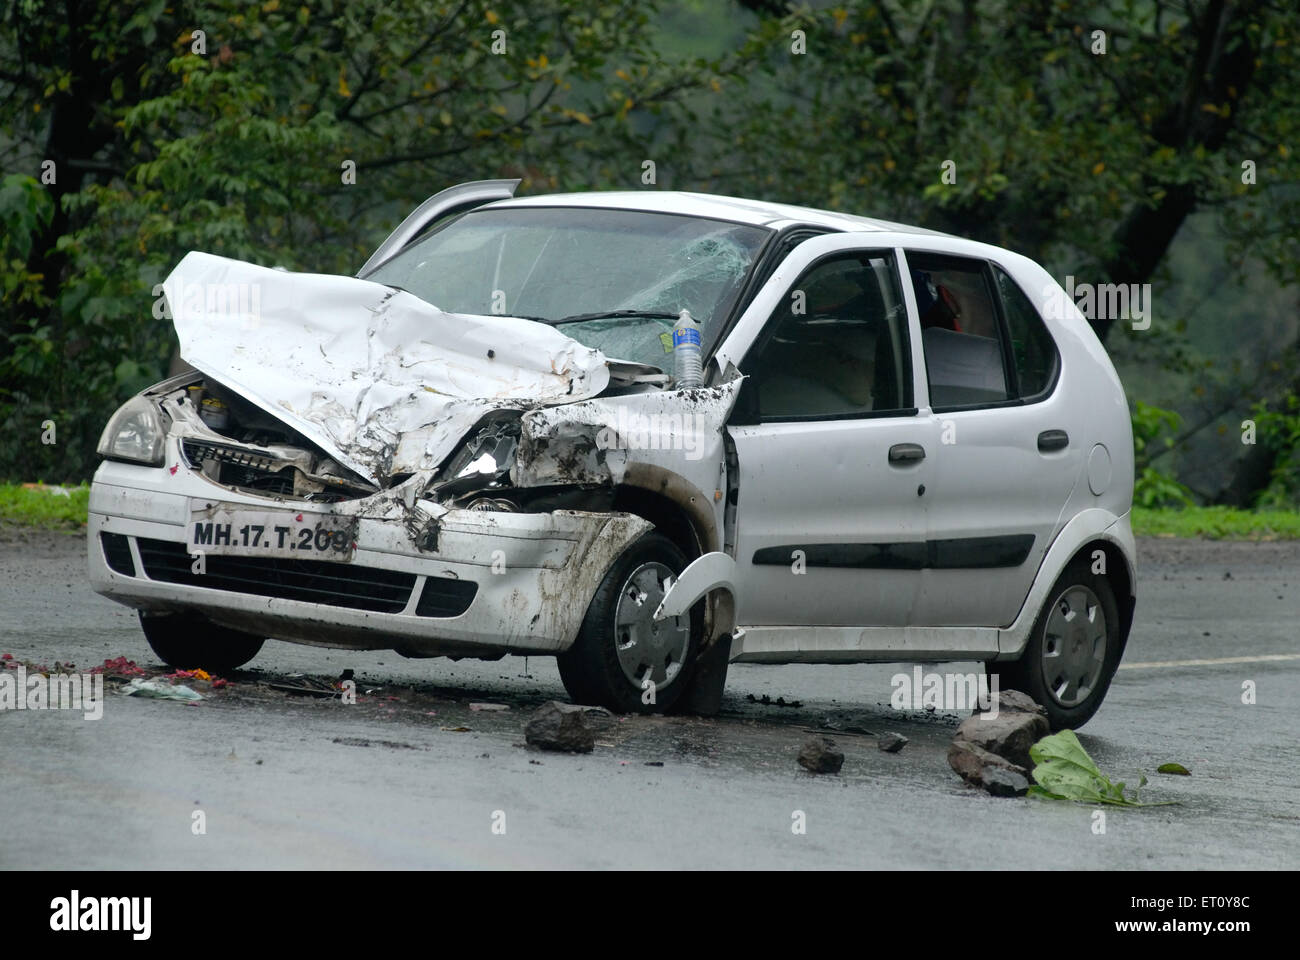

In [36]:
Image.open("C:\\Users\\DELL\\Desktop\\SANJAY\\Car3.jpg")

In [37]:
data = "C:\\Users\\DELL\\Desktop\\SANJAY\\Car3.jpg"
image = cv2.imread(data)
print(detect(image))

1/1 [==============================] - 1s 518ms/step
severe


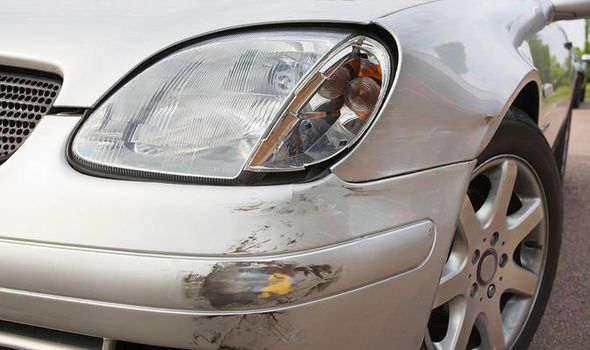

In [38]:
Image.open("C:\\Users\\DELL\\Desktop\\SANJAY\\Car4.jpg")

In [39]:
data = "C:\\Users\\DELL\\Desktop\\SANJAY\\Car4.jpg"
image = cv2.imread(data)
print(detect(image))

1/1 [==============================] - 0s 325ms/step
minor
